# gradient-transfer
An experiment with intensity-based and correspondence-based color transfer.

In [1]:
from PIL import Image
from gradient_transfer import getGradientMap, applyGradientMap
from color_transfer import ColorMap

from time import time
from ipyplot import plot_images as show
from warnings import filterwarnings
filterwarnings('ignore')

## gradient_transfer.py
This takes gradient information from one image and applies it to another based on intensity (grayscale values).


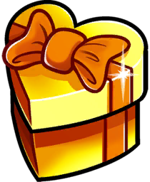
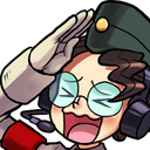
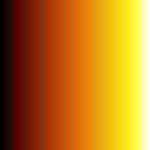
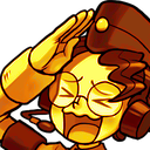


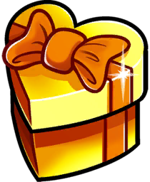
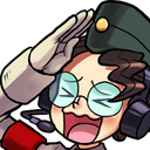
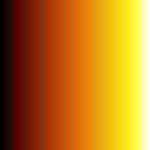
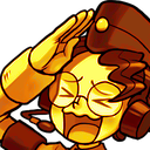

Gold-Gift Gradient Map extracted in 0.036 seconds and applied in 0.010 seconds.


In [2]:
goldgift = Image.open('./input/GiftIcon_Gold.png')
molly = Image.open('./input/molly.png')

t0 = time()
goldmap = getGradientMap(goldgift)
t1 = time()
goldmolly = applyGradientMap(molly, goldmap)
t2 = time()

goldgradient = getGradientMap(goldgift, justcompare=True)
show(
    [goldgift, molly, goldgradient, goldmolly],
    ['(210×256)', '(128×128)', '(256×256)', '(128×128)'],
    ['GiftIcon_Gold.png', 'molly.png', 'gradient extracted from GiftIcon_Gold.png', 'gradient extracted from GiftIcon_Gold.png applied to molly.png']
)
print('Gold-Gift Gradient Map extracted in {:.3f} seconds and applied in {:.3f} seconds.'.format(t1 - t0, t2 - t1))

Any missing intensity values are filled in by averaging existing intesity values weighed exponentially by distance.

In the first gradient shown below, the bottom half of the gradient shows missing intensity values as green lines and the top half shows the completed gradient after filling them in from the surrounding colors.

Scaling up the input can also fill in missing values, as shown below in the second gradient. This gives a smoother result too, which yields a better output when applying the gradient to another image.


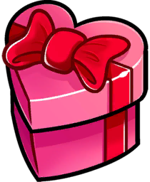
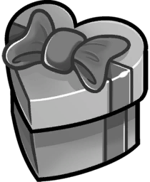
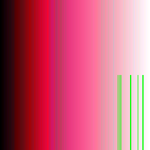
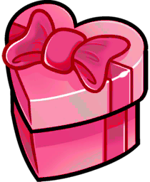
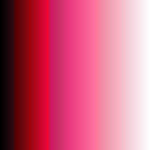
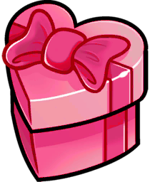


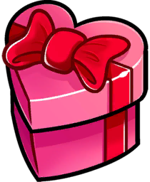
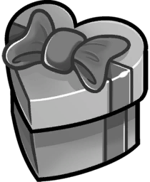
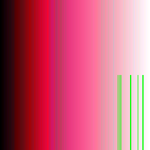
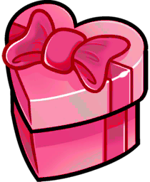
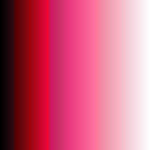
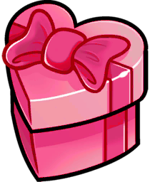

Pink-Gift Gradient Map extracted in 0.047 seconds and applied in 0.053 seconds.
Scaled-Up-Pink-Gift Gradient Map extracted in 0.155 seconds and applied in 0.025 seconds.


In [3]:
pinkgift = Image.open('./input/GiftIcon_Standard.png')
greygift = Image.open('./input/GiftIcon_Grey.png')

t0 = time()
pinkmap = getGradientMap(pinkgift)
t1 = time()
ungrey = applyGradientMap(greygift, pinkmap)
t2 = time()
pinkmap2 = getGradientMap(pinkgift, 2)
t3 = time()
ungrey2 = applyGradientMap(greygift, pinkmap2)
t4 = time()

pinkgradient = getGradientMap(pinkgift, justcompare=True)
pinkgradient2 = getGradientMap(pinkgift, 2, justcompare=True)
show(
    [pinkgift, greygift, pinkgradient, ungrey, pinkgradient2, ungrey2],
    ['(210×256)', '(210×256)', '(256×256)', '(210×256)', '(256×256)', '(210×256)'],
    ['GiftIcon_Standard.png', 'GiftIcon_Grey.png', 'gradient extracted from GiftIcon_Standard.png', 'gradient extracted from GiftIcon_Standard.png applied to GiftIcon_Grey.png', 'gradient extracted from GiftIcon_Standard.png scaled by 2', 'gradient extracted from GiftIcon_Standard.png scaled by 2 applied to GiftIcon_Grey.png']
)
print('Pink-Gift Gradient Map extracted in {:.3f} seconds and applied in {:.3f} seconds.'.format(t1 - t0, t2 - t1))
print('Scaled-Up-Pink-Gift Gradient Map extracted in {:.3f} seconds and applied in {:.3f} seconds.'.format(t3 - t2, t4 - t3))

Since there are only 256 intensity values, larger image dimensions should only affect execution time of gradient extraction and gradient application by a few seconds at most. The time scales linearly proportional to the number of pixels.


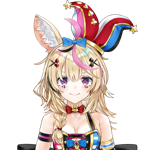
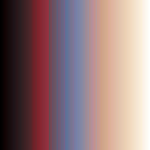
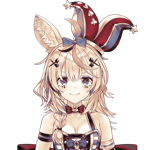


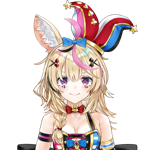
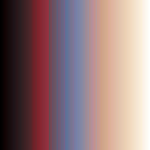
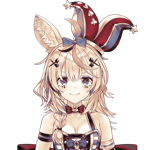

Polka Gradient Map extracted in 4.483 seconds and applied in 4.407 seconds.


In [4]:
pol = Image.open('./input/pol.png')

t0 = time()
polmap = getGradientMap(pol)
t1 = time()
polpol = applyGradientMap(pol, polmap)
t2 = time()

polgradient = getGradientMap(pol, justcompare=True)
show(
    [pol, polgradient, polpol],
    ['(3061×3061)', '(256×256)', '(3061×3061)'],
    ['pol.png', 'gradient extracted from pol.png', 'gradient extracted from pol.png applied to pol.png']
)
print('Polka Gradient Map extracted in {:.3f} seconds and applied in {:.3f} seconds.'.format(t1 - t0, t2 - t1))

## color_transfer.py
This takes two color variations of an image to create a correspondence mapping that can be applied to similarly colored images.


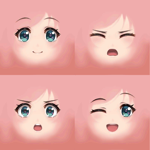
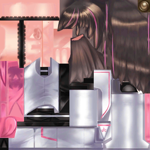
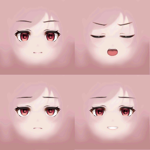
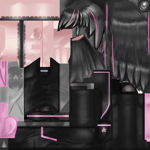


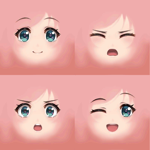
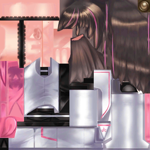
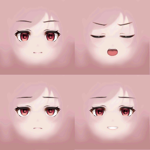
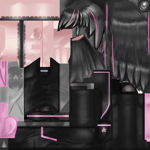


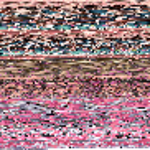
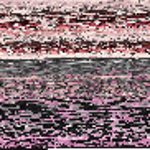
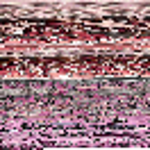
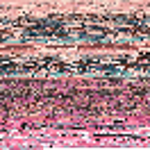


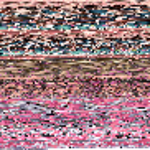
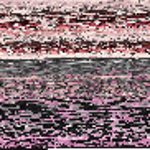
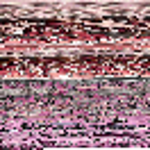
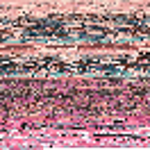

Kizuna-AI-to-Black-AI Color Map (k2b) initialized in 0.734 seconds.
Black-AI-to-Kizuna-AI Color Map (b2k) initialized in 0.678 seconds.


In [5]:
kface = Image.open('./input/ai/unit_model_804_02_face_texture.png')
kbody = Image.open('./input/ai/unit_model_804_02_texture.png')
bface = Image.open('./input/ai/unit_model_804_03_face_texture.png')
bbody = Image.open('./input/ai/unit_model_804_03_texture.png')

t0 = time()
k2b = ColorMap()
k2b.addMultiple([(kface, bface), (kbody, bbody)])
t1 = time()
b2k = ColorMap()
b2k.addMultiple([(bface, kface), (bbody, kbody)])
t2 = time()

show(
    [kface, kbody, bface, bbody],
    ['(512×512)', '(512×512)', '(512×512)', '(512×512)'],
    ['unit_model_804_02_face_texture.png (kface)', 'unit_model_804_02_texture.png (kbody)', 'unit_model_804_03_face_texture.png (bface)', 'unit_model_804_03_texture.png (bbody)']
)
show(
    k2b.dumpSparseMap() + b2k.dumpSparseMap(),
    ['({} pixels)'.format(len(k2b.sparsemap)), '({} pixels)'.format(len(k2b.sparsemap)), '({} pixels)'.format(len(b2k.sparsemap)), '({} pixels)'.format(len(b2k.sparsemap))],
    ['all colors in kface+kbody', 'colors in bface+bbody corresponding to the colors in kface+kbody', 'all colors in bface+bbody', 'colors in kface+kbody corresponding to the colors in bface+bbody']
)
print('Kizuna-AI-to-Black-AI Color Map (k2b) initialized in {:.3f} seconds.'.format(t1 - t0))
print('Black-AI-to-Kizuna-AI Color Map (b2k) initialized in {:.3f} seconds.'.format(t2 - t1))

With the large amount of time it takes to apply color maps, it is a good idea to check their quality before proceeding. To do so, simply apply the color map to its reference image(s) and compare. This is the quickest way since these images don't contain any new colors to calculate.

The result of k2b looks decent, but b2k does not. Although disappointing, it would be wise to abandon b2k now as it will not be able to produce any good output for any given input.


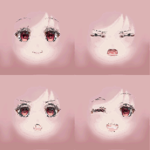
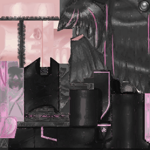
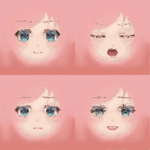
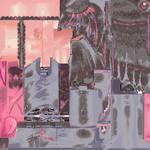


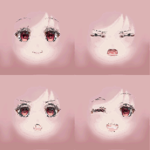
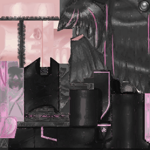
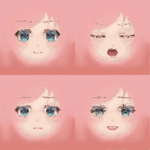
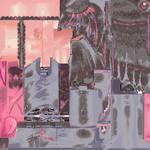

Two k2b and two b2k applications performed in 0.789 seconds.


In [6]:
t0 = time()
k2bface = k2b.apply(kface)
k2bbody = k2b.apply(kbody)
b2kface = b2k.apply(bface)
b2kbody = b2k.apply(bbody)
t1 = time()

show(
    [k2bface, k2bbody, b2kface, b2kbody],
    ['(512×512)', '(512×512)', '(512×512)', '(512×512)'],
    ['k2b applied to kface', 'k2b applied to kbody', 'b2k applied to bface', 'b2k applied to bbody']
)
print('Two k2b and two b2k applications performed in {:.3f} seconds.'.format(t1 - t0))

Unlike gradient_transfer.py which has just 256 intensity values to store, color_transfer.py has to deal with 256³ = 16,777,216 possible color values. 

Calculating the mapping of a new color thus takes a lot of time, so missing values are not immediately filled in on initialization. Color values are instead calculated and memoized as needed whenever the color map is applied. Note below how the amount of stored color correspondences increase in k2b and b2k.

(Also note how terrible b2k is, as predicted earlier. It will not be used in any further examples.)


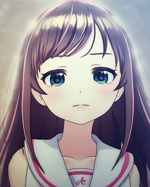
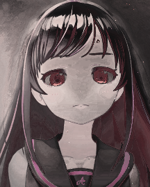
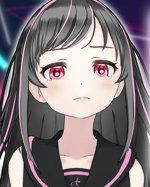
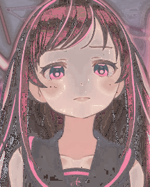


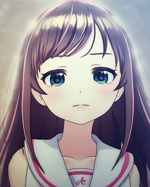
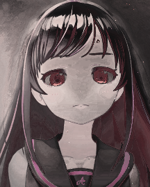
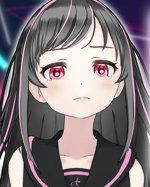
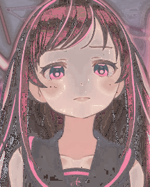


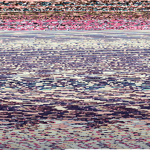
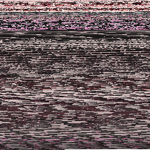
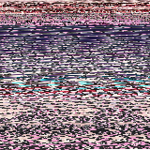
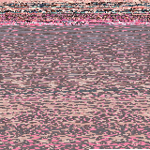


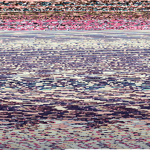
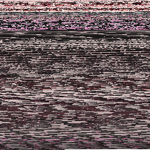
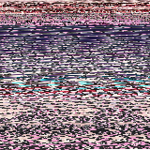
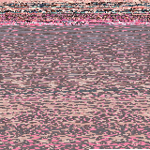

k2b applied in 169.611 seconds.
b2k applied in 58.030 seconds.


In [7]:
ap = Image.open('./input/ai/artistprofile.png')
mw = Image.open('./input/ai/meltyworld.png')

t0 = time()
k2bap = k2b.apply(ap, 0.27)
t1 = time()
b2kmw = b2k.apply(mw, 0.375)
t2 = time()

show(
    [ap, k2bap, mw, b2kmw],
    ['(800×1000)', '(216×270)', '(576×720)', '(216×270)'],
    ['artistprofile.png', 'k2b applied to artistprofile.png', 'meltyworld.png', 'b2k applied to meltyworld.png']
)
show(
    k2b.dumpMemoMap() + b2k.dumpMemoMap(),
    ['({} pixels)'.format(len(k2b.memomap)), '({} pixels)'.format(len(k2b.memomap)), '({} pixels)'.format(len(b2k.memomap)), '({} pixels)'.format(len(b2k.memomap))],
    ['all colors in kface+kbody plus artistprofile.png', 'corresponding colors in bface+bbody plus colors mapped from artistprofile', 'all colors in bface+bbody plus meltyworld.png', 'corresponding colors in kface+kbody plus colors mapped from meltyworld']
)
print('k2b applied in {:.3f} seconds.'.format(t1 - t0))
print('b2k applied in {:.3f} seconds.'.format(t2 - t1))

To alleviate the problem of time, there are alternative color estimation methods available.

The default option does what gradient_transfer.py does, calculating a weighted average from every single initially stored color.

The second option groups stored colors by similarity and calculates a simple average from the top 16 groups.

The third option calculates similarity and takes the first 100 colors.

The fourth option does the same as the default option, but simply returns the input color is dissimilar enough from all other stored colors.

The fifth option 


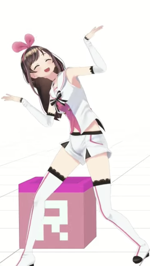
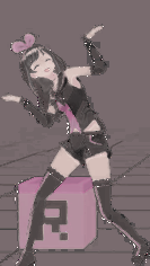
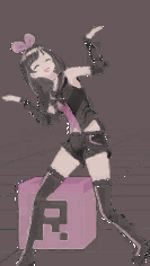
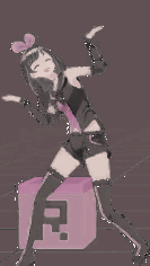
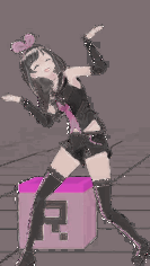
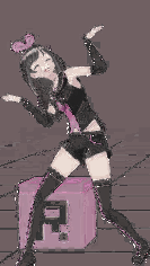


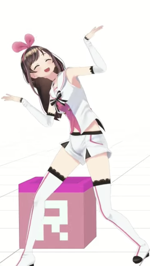
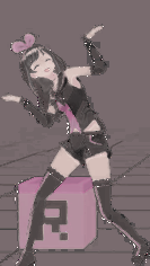
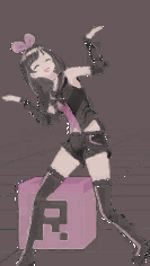
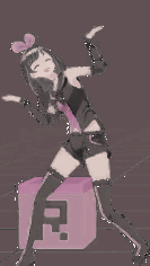
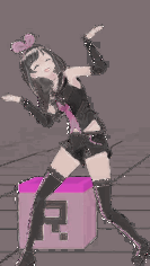
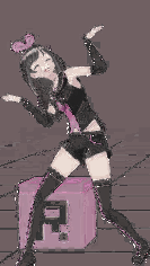


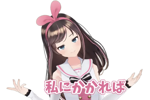
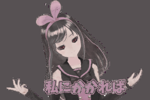
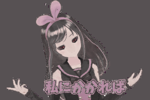
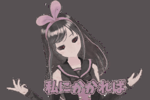
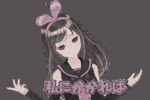
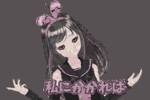


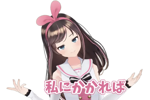
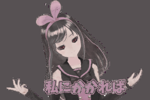
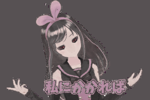
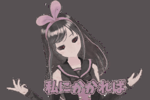
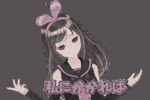
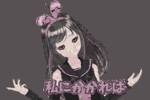


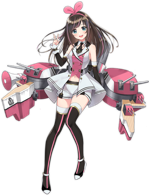
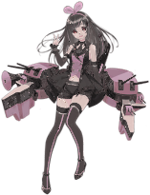
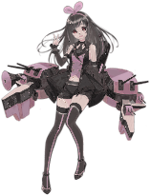
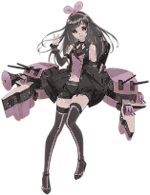
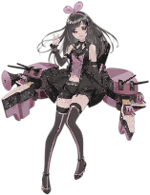
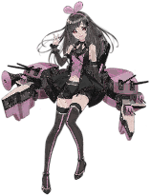


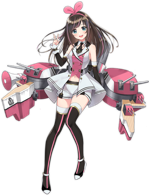
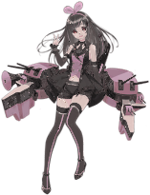
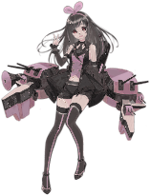
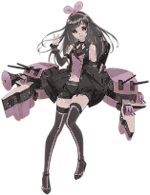
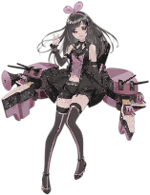
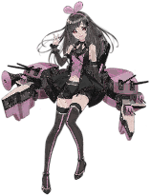


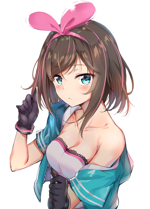
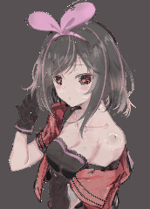
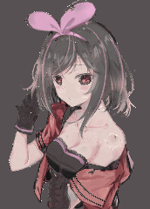
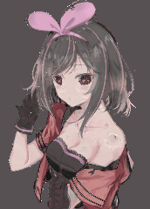
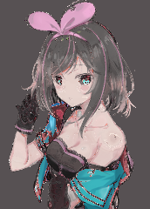
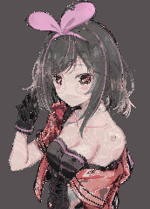


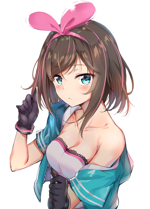
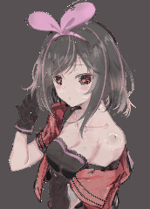
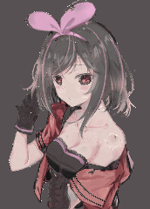
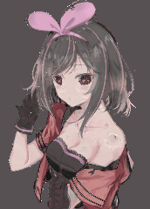
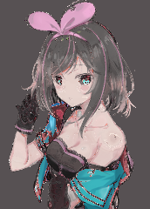
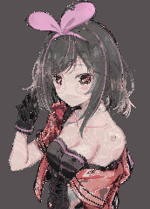

Total Time Taken: 1852.395 seconds


In [10]:
tat = Image.open('./input/ai/terribleautotranslation.png')
hrt = Image.open('./input/ai/highrangetest.png')
azr = Image.open('./input/ai/azur.png')
tmp = Image.open('./input/ai/temp.jpeg')

t0 = time()
for img in [tat, hrt, azr, tmp]:
    imgs = [img]
    ttls = ['({}×{})'.format(*img.size)]
    lbls = ['Input']
    for i in range(5):
        k2b.initMaps() # clear memoized color mappings
        t1 = time()
        m = k2b.apply(img, 0.2, method=i)
        t2 = time()
        imgs.append(m)
        ttls.append('({}×{})'.format(*m.size))
        lbls.append('Method {}: {:.1f} seconds'.format(i, t2 - t1))
        m.save('./output/ai/img{}-m{}.png'.format(img.filename.split('/')[-1].split('.')[0], i))
    show(imgs, ttls, lbls)
t3 = time()

print('Total Time Taken: {:.3f} seconds'.format(t3 - t0))

## Other Scripts
- **gild_sprites.py** uses gradient_transfer.py to turn unpalettized Skullgirls Mobile portraits gold.
- **color_storage_test** tests efficiency of different structures for color storage for color_transfer.py.